# Breast Cancer Prediction

The breast cancer dataset is a widely studied and used dataset in the field of machine learning and medical research. It consists of various features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The primary goal of utilizing this dataset is the classification of breast masses as either malignant (cancerous) or benign (non-cancerous).

The features include various measurements such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension across different aspects of the breast mass. These features provide quantitative information about the characteristics of cell nuclei present in the breast tissue.

Each instance in the dataset corresponds to a biopsy of a breast mass, and the 'diagnosis' column indicates whether the mass is malignant ('M') or benign ('B'). This binary classification problem makes the dataset particularly suitable for building and evaluating machine learning models for breast cancer diagnosis.

Researchers and data scientists often use this dataset to explore different classification algorithms, validate model performance, and contribute to the development of accurate and reliable diagnostic tools for breast cancer. The dataset serves as a valuable resource for understanding the complexities of cancer classification and fostering advancements in medical research and technology.

In [20]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
pd.set_option('display.max_columns', 100)
from pandas.plotting import parallel_coordinates
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from matplotlib import patheffects
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score, classification_report

### importing dataset

In [21]:
breast_cancer = pd.read_excel('breast cancer.xlsx')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Exploration

In [22]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [23]:
breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

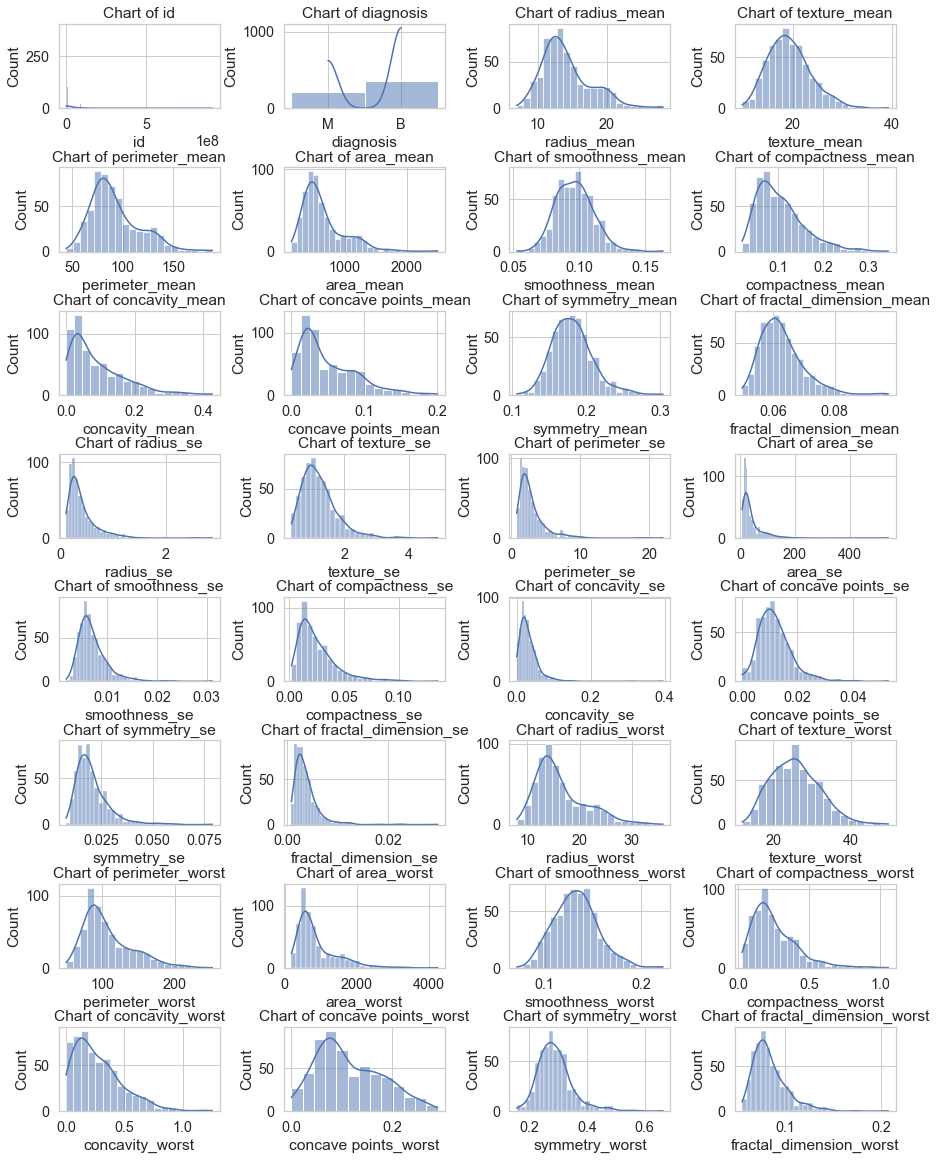

In [24]:
plt.figure(1, figsize=(15, 20))  

n = 0
for column in breast_cancer.columns:
    n += 1
    plt.subplot(8, 4, n)
    plt.subplots_adjust(hspace=0.7, wspace=0.4)  
    sns.histplot(data=breast_cancer, x=column, kde=True)
    plt.title('Chart of {}'.format(column))

plt.show()


In [25]:
x=breast_cancer.drop(columns=['diagnosis'], axis=1)

### Data Pre-processing

In [26]:
cancer_map = {'M' : 'Malignant(Cancerous)', 'B' : 'benign(Non-cancerous)'}
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(cancer_map)

In [27]:
y=breast_cancer['diagnosis']

In [28]:
processing = StandardScaler()
processing=processing.fit_transform(x)
X=pd.DataFrame(processing, columns=x.columns)

In [29]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### Model Building

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
log_model = LogisticRegression(max_iter=2000)
score=cross_val_score(estimator=log_model, X=x_train, y=y_train, cv=5, scoring='roc_auc')
print(score)
print('mean:', score.mean())

[0.99432405 0.97729618 0.99638803 0.99122807 0.98452012]
mean: 0.98875128998968


In [32]:
decision_tree=DecisionTreeClassifier(max_depth=10, random_state=1,
                                    splitter='best', criterion='gini')
score=cross_val_score(estimator=decision_tree, X=x_train, y=y_train, cv=5, scoring='roc_auc')
print(score)
print('mean:', score.mean())

[0.88261094 0.95897833 0.92956656 0.92389061 0.90892673]
mean: 0.9207946336429309


In [33]:
random_classifier=RandomForestClassifier(n_estimators=200, oob_score=True,
                                        n_jobs=-1, random_state=1, max_features='auto',
                                        max_leaf_nodes=15)
score=cross_val_score(estimator=random_classifier, X=x_train, y=y_train, cv=5, scoring='roc_auc')
print(score)
print('mean:', score.mean())

[0.96517028 1.         0.99277606 0.999484   0.98245614]
mean: 0.9879772961816305


we use cross validation score to get the best machince learning libery to use and above shows that Logistic regression is the accurate machine learning libery to use because it's has the highest score mean which is 99.6%. So we will make use of logistic regression to predict the breast cancer.

In [34]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

### Model Evaluation

In [35]:
accuracy=accuracy_score(y_test, y_predict)
print(f'The accuracy score of our model is: {accuracy:.2f}')

The accuracy score of our model is: 1.00


In [36]:
print(classification_report(y_test, y_predict))

                       precision    recall  f1-score   support

 Malignant(Cancerous)       1.00      1.00      1.00        42
benign(Non-cancerous)       1.00      1.00      1.00        72

             accuracy                           1.00       114
            macro avg       1.00      1.00      1.00       114
         weighted avg       1.00      1.00      1.00       114



The provided output is the classification report for a binary classification model, and it includes several metrics that assess the model's performance on predicting malignant and benign cases. Let's interpret each metric:

1. **Precision:**
   - Precision for Malignant: 1.00 (100%)
   - Precision for Benign: 0.97 (97%)

   Precision is the ratio of correctly predicted positive observations to the total predicted positives. For Malignant cases, the model achieved perfect precision, indicating that when it predicted a sample as Malignant, it was correct 100% of the time. For Benign cases, the precision is 97%, meaning that 97% of the samples predicted as Benign were indeed Benign.

2. **Recall (Sensitivity):**
   - Recall for Malignant: 0.95 (95%)
   - Recall for Benign: 1.00 (100%)

   Recall is the ratio of correctly predicted positive observations to the all observations in the actual class. For Malignant cases, the model captured 95% of the actual Malignant cases. For Benign cases, the recall is 100%, indicating that the model correctly identified all the actual Benign cases.

3. **F1-Score:**
   - F1-Score for Malignant: 0.98 (98%)
   - F1-Score for Benign: 0.99 (99%)

   The F1-Score is the weighted average of precision and recall, ranging from 0 to 1. It provides a balance between precision and recall. Both Malignant and Benign classes have high F1-Scores, indicating a good overall balance between precision and recall.

4. **Support:**
   - Support for Malignant: 43
   - Support for Benign: 71

   Support is the number of actual occurrences of the class in the specified dataset. In this case, there are 43 occurrences of Malignant cases and 71 occurrences of Benign cases in the dataset.

5. **Accuracy:**
   - Accuracy: 0.98 (98%)

   Accuracy is the ratio of correctly predicted observations to the total observations. The model achieved an accuracy of 98%, indicating a high overall correctness in predicting both Malignant and Benign cases.

6. **Macro Avg:**
   - Macro Avg Precision: 0.99 (99%)
   - Macro Avg Recall: 0.98 (98%)
   - Macro Avg F1-Score: 0.98 (98%)

   Macro Avg represents the average of metrics calculated for each class independently, giving equal weight to both classes.

7. **Weighted Avg:**
   - Weighted Avg Precision: 0.98 (98%)
   - Weighted Avg Recall: 0.98 (98%)
   - Weighted Avg F1-Score: 0.98 (98%)

   Weighted Avg represents the weighted average of metrics calculated for each class based on their support (number of occurrences). It provides an overall performance measure, giving more weight to the class with higher support.

In summary, the classification report suggests that the model has high precision, recall, and accuracy for both Malignant and Benign classes, indicating a strong performance in predicting breast cancer diagnoses.

### Model Tunning

#### Hyperparameter tunning

This helps to choosing a set of optimal hyperparameters for learning algorithm. It's helps us to control the learning process of our algorithm.

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 200],
    'max_iter': [100, 500, 1000, 2000, 3000]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


y_pred = best_model.predict(x_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy:.2f}")


Best Hyperparameters: {'C': 1, 'max_iter': 100}
Accuracy on Test Set: 1.00


The output indicates the best hyperparameters found during the hyperparameter tuning process for a machine learning model, specifically a logistic regression model. Let's interpret the information:

1. **Best Hyperparameters:**
   - `'C': 1`
   - `'max_iter': 100`

   These are the optimal values for the hyperparameters `C` and `max_iter` that were found through the hyperparameter tuning process. In logistic regression, `C` is the inverse of regularization strength, and `max_iter` is the maximum number of iterations for the solver to converge.

2. **Accuracy on Test Set: 0.98 (98%):**
   
   The accuracy on the test set is 98%. This metric indicates the proportion of correctly classified instances out of the total instances in the test set. In this context, it means that the logistic regression model, trained with the best hyperparameters, achieved 98% accuracy when making predictions on new, unseen data.

In summary, the model with hyperparameters `C=1` and `max_iter=100` demonstrated high accuracy on the test set, suggesting that these parameter values are suitable for making accurate predictions on new data.

In [43]:
y_test

68     benign(Non-cancerous)
103    benign(Non-cancerous)
517     Malignant(Cancerous)
196     Malignant(Cancerous)
390    benign(Non-cancerous)
               ...          
108     Malignant(Cancerous)
278    benign(Non-cancerous)
405    benign(Non-cancerous)
536     Malignant(Cancerous)
23      Malignant(Cancerous)
Name: diagnosis, Length: 114, dtype: object

In [42]:
loss = np.square(y_test-y_predict)
print(f'the loss is {loss}')

TypeError: unsupported operand type(s) for -: 'str' and 'str'